In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("Data.csv")

In [49]:
data['Stroke(AIS,TIA,AHS)'] = 1
data

,"Stroke(AIS,TIA,AHS)",Sex01,StrokeAge,gFGB,gF2,gF5,gF7VII,gF13,gITGA,gITGB,...,gADD1 1378 G>T,gAGT T704C,gAGT C521T,gAGTR1 A 1166C,gAGTR2 G1675A,gCYP11B2 C344T,gGNB3 825C>T,gNOS3 T786C,gNOS3 G894T,DisNeuro01
0,1,1,1.0,0,0,0,0.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0
1,1,1,3.0,0,0,0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0
2,1,0,5.0,0,0,0,0.0,1.0,1.0,2.0,...,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0
3,1,1,0.0,0,0,0,0.0,0.0,2.0,1.0,...,0.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,0
4,1,1,13.0,0,0,0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1,0,0.0,0,0,0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0
6,1,1,1.0,0,0,0,0.0,0.0,2.0,2.0,...,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,0
7,1,0,2.0,0,0,0,0.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1,0,2.0,0,0,0,0.0,1.0,1.0,0.0,...,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
9,1,0,8.0,0,0,0,1.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [50]:
X = data.ix[:, :-1]
Y = data.ix[:, -1]

X_dropped = data.dropna().ix[:, :-1]
Y_dropped = data.dropna().ix[:, -1]

попытаемся сделать еще выборку на данных, отбросив некоторые признаки

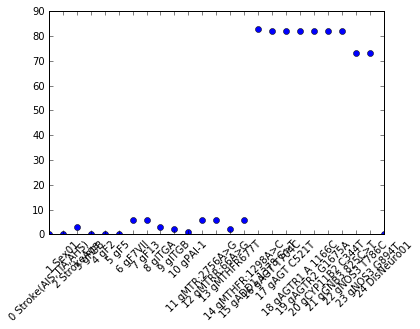

In [220]:
nulls = data.isnull().sum()
keys = nulls.keys()
values = nulls.values
words = [str(i)+" "+k.decode('utf-8').encode('ascii', 'ignore') for i, k in enumerate(nulls.keys())]

ind = np.arange(len(keys)) 
rects = ax.bar(ind, nulls.values)

ax = plt.figure().add_subplot(111)
ax.set_xticks(ind)
ax.plot(values, 'o')
xtickNames = ax.set_xticklabels(words)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.show()

Мы видим, что в 9 столбцах из 24 имеется большое число пропусков. Удалим столбцы, а затем удалим из полученного фрейма строки, включающие в себя null'ы (их будет порядка десяти):

In [259]:
a = pd.DataFrame(values, keys)
indexes = a.loc[:].where(a < 50).dropna().index

In [270]:
data_chopped = data[indexes].dropna()
X_chopped = data_chopped.ix[:, :-1]
Y_chopped = data_chopped.ix[:, -1]
data_chopped.shape

(143, 16)

In [275]:
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Xd_train, Xd_test, yd_train, yd_test = train_test_split( 
    X_dropped, Y_dropped, test_size = 0.2, random_state=1)
kf = KFold(n_splits=3)

In [276]:
Xd_train

,"Stroke(AIS,TIA,AHS)",Sex01,StrokeAge,gFGB,gF2,gF5,gF7VII,gF13,gITGA,gITGB,...,gMTHFR:1298A>C,gADD1 1378 G>T,gAGT T704C,gAGT C521T,gAGTR1 A 1166C,gAGTR2 G1675A,gCYP11B2 C344T,gGNB3 825C>T,gNOS3 T786C,gNOS3 G894T
122,1,1,0.0,1,0,0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0
134,1,1,1.0,1,0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
110,1,1,9.0,1,0,0,0.0,0.0,2.0,1.0,...,2.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0
117,1,1,1.0,1,0,0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
100,1,1,2.0,0,0,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,1.0
106,1,1,2.0,0,0,0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
73,1,0,4.0,2,0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
44,1,1,6.0,1,0,0,0.0,2.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
124,1,0,0.0,1,0,0,0.0,0.0,2.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0
5,1,0,0.0,0,0,0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0


In [288]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(Xd_train, yd_train)
res = dt.predict(Xd_test)

print [str(i) + '; ' + str(j) for i, j in zip(res, yd_test)]

['0; 1', '1; 0', '1; 1', '0; 1', '1; 0', '0; 1', '0; 1', '0; 1', '0; 1', '1; 0', '1; 0', '0; 1', '0; 1', '0; 0', '1; 1']


In [291]:
yd_test

138    1
51     0
140    1
115    1
52     0
130    1
103    1
79     1
101    1
69     0
3      0
82     1
114    1
75     0
93     1
Name: DisNeuro01, dtype: int64

In [57]:
X_train = data.dropna().ix[:, data.columns != 'DisNeuro01']
Y_train = data.dropna().ix[:, data.columns == 'DisNeuro01']

X_test = data.dropna().ix[55:, data.columns != 'DisNeuro01']
Y_test = data.dropna().ix[55:, data.columns == 'DisNeuro01']

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

array([0])

ImportError: No module named pydotplus

In [71]:
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train, Y_train.values.ravel())
a = rf.predict(X_test)


importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 1 (0.099607)
2. feature 11 (0.077357)
3. feature 9 (0.073330)
4. feature 17 (0.071140)
5. feature 7 (0.068179)
6. feature 19 (0.062750)
7. feature 2 (0.058454)
8. feature 20 (0.054631)
9. feature 10 (0.049343)
10. feature 18 (0.048569)
11. feature 16 (0.045839)
12. feature 15 (0.045649)
13. feature 12 (0.040624)
14. feature 21 (0.034419)
15. feature 22 (0.029855)
16. feature 4 (0.028742)
17. feature 6 (0.026364)
18. feature 5 (0.020897)
19. feature 8 (0.019844)
20. feature 0 (0.017010)
21. feature 14 (0.014516)
22. feature 13 (0.012882)
23. feature 3 (0.000000)


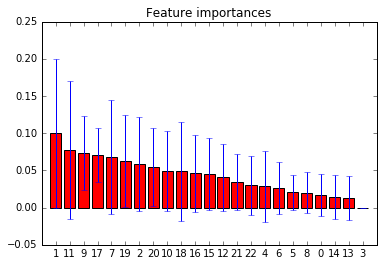

In [75]:
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()